# Optimizing Hyper Parameters and Cross Validation

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# Print multiple statements in same line

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load dataset

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()
df.tail()
df.shape
df.info()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


(891, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Data Cleaning

### Drop unnecessary/redundant columns

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

* Deck has many missing values
* embark_town has three values with different first letters, so we drop this and retain embarked
* who and adult_male are redundant as we have sex
* alive is redundant as we have survived
* alone is redundant as we have sibsp, parch
* class is redundant as we have pclass

In [ ]:
df.drop(columns = ['who', 'adult_male','embark_town','alive', 'alone','class','deck'], inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Rename columns

In [ ]:
df = df.rename(columns = {'sex':'gender','sibsp':'siblings','parch':'parents_child'})
df.head()

,survived,pclass,gender,age,siblings,parents_child,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Check for missing values

In [ ]:
df.isna().sum()

survived           0
pclass             0
gender             0
age              177
siblings           0
parents_child      0
fare               0
embarked           2
dtype: int64

In [ ]:
df[df['embarked'].isna()]

,survived,pclass,gender,age,siblings,parents_child,fare,embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [ ]:
df_age_missing = df[df['age'].isna()]
df_age_missing.shape
df_age_missing.sample(5)

(177, 8)

,survived,pclass,gender,age,siblings,parents_child,fare,embarked
727,1,3,female,NaN,0,0,7.7375,Q
547,1,2,male,NaN,0,0,13.8625,C
185,0,1,male,NaN,0,0,50.0000,S
602,0,1,male,NaN,0,0,42.4000,S
303,1,2,female,NaN,0,0,12.3500,Q


In [ ]:
df[df['survived'].isna()]

,survived,pclass,gender,age,siblings,parents_child,fare,embarked


#### Fill missing data with certain values

In [ ]:
df_original = df.copy()

#### Replace with median for numerical values

In [ ]:
df = df.fillna(df.median())

<ipython-input-23-a187aa03e3ee>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [ ]:
df[df['age'].isna()]

,survived,pclass,gender,age,siblings,parents_child,fare,embarked


In [ ]:
df.isna().sum()

survived         0
pclass           0
gender           0
age              0
siblings         0
parents_child    0
fare             0
embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   gender         891 non-null    object 
 3   age            891 non-null    float64
 4   siblings       891 non-null    int64  
 5   parents_child  891 non-null    int64  
 6   fare           891 non-null    float64
 7   embarked       889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Replace missing values with mode for the categorical vars

In [ ]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])  # There can be multi mode models

In [ ]:
df.isna().sum()

survived         0
pclass           0
gender           0
age              0
siblings         0
parents_child    0
fare             0
embarked         0
dtype: int64

### Outlier Treatment

#### Dummy Coding

In [ ]:
# Dummy coding of categorical variables
for x in df.columns:
  if df[x].dtype == "object":
    df[x] = pd.Categorical(df[x]).codes

df.head()

,survived,pclass,gender,age,siblings,parents_child,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


#### Flooring and Capping for all columns in the dataset

In [ ]:
for x in df.columns:
  outlier = df[x].quantile([0.01,0.99]).values
  df[x] = np.clip(df[x], outlier[0], outlier[1])

## Model Building

### Split the dataset into features and labels

In [ ]:
x = df.drop('survived', axis = 1)
y = df['survived']
x.head()
y.head()

,pclass,gender,age,siblings,parents_child,fare,embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score

### Create train and test data sets with 75% train to 25% test ratio

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(668, 7)

(223, 7)

(668,)

(223,)

# Decision Tree

In [ ]:
# Import sklearn packages for doing ML modeling
from sklearn import tree

## Step 1 - Create Features and Label

## Step 2 - Split Train and Test Data

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 999)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(712, 7)

(179, 7)

(712,)

(179,)

## Step 3 - Create instance of the model


In [ ]:
mytree = tree.DecisionTreeClassifier(min_samples_leaf = 50, min_samples_split = 200)

## Step 4 - Fit Model


In [ ]:
mytree.fit(train_x, train_y)

DecisionTreeClassifier(min_samples_leaf=50, min_samples_split=200)

## Step 5 - Predict using the trained model

In [ ]:
predicted = mytree.predict(test_x)
predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1])

## Step 6 - Evaluate Model Performance

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_y, predicted))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       115
           1       0.73      0.55      0.62        64

    accuracy                           0.77       179
   macro avg       0.75      0.72      0.73       179
weighted avg       0.76      0.77      0.76       179



## Confusion Matrix Plot using Seaborn

In [ ]:
df_confusion = metrics.confusion_matrix(test_y, predicted)
df_confusion

array([[102,  13],
       [ 29,  35]])

<Axes: >

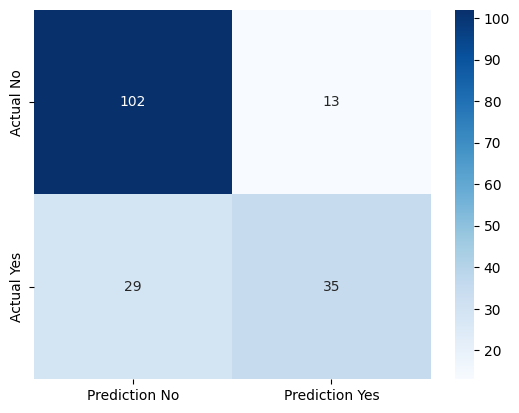

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_confusion, cmap = 'Blues', xticklabels=['Prediction No', 'Prediction Yes'],
            yticklabels=['Actual No','Actual Yes'],
            annot=True, fmt='d')
plt.show()

In [ ]:
# Classification Accuracy Computation
metrics.accuracy_score(test_y, predicted)


0.7653631284916201

In [ ]:
# Install graphviz to visualize tree
!pip install graphviz
import graphviz

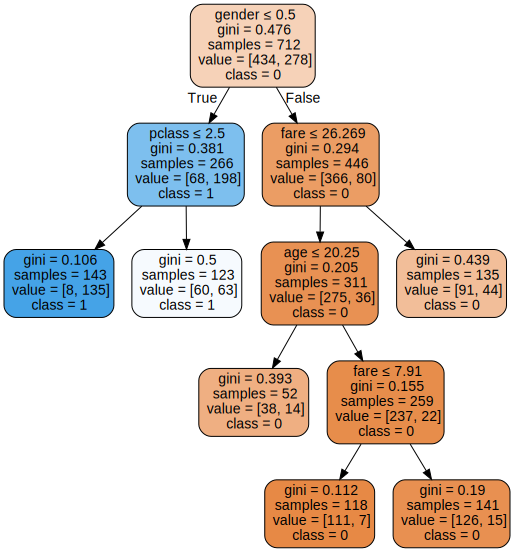

In [ ]:
dot_data = tree.export_graphviz(mytree, out_file = None, feature_names = x.columns,
                                class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
graph.render('Titanic.png')

'Titanic.png.pdf'

# Hyper-Parameter Optimmization

In [ ]:
mytree = tree.DecisionTreeClassifier(random_state=99, class_weight="balanced")
# class_weight - pay equal attention to both classes that exist and don't overlearn the most occuring class
# If a class say o out of [0,1] occurs most, the model learns 0 and tends to predict that only more

In [ ]:
my_max_depth = [2, 3, 4, 5, 10]  # 5
my_criterion = ['gini', 'entropy']  # 2
my_min_samples_leaf = [2, 5, 10, 15, 20, 25]  # 6
my_mins_samples_split = [2, 5, 10, 15, 50, 100]  # 6

In [ ]:
# number of models
import math
lengths = map(len, [my_max_depth, my_criterion, my_min_samples_leaf, my_mins_samples_split])
math.prod(lengths)

360

In [ ]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [ ]:
# Building the model


# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
# I need recall to be highest - Here we are trying to predict who will be survivors best, hence, recall is perfect
grid = GridSearchCV(estimator = mytree, cv = 5, scoring = 'recall',
                    param_grid = dict(max_depth = my_max_depth, criterion=my_criterion,
                                      min_samples_leaf = my_min_samples_leaf,
                                      min_samples_split = my_mins_samples_split))

In [ ]:
grid.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10, 15, 50, 100]},
             scoring='recall')

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 50}

In [ ]:
grid.best_estimator_.feature_importances_

array([0.17766848, 0.64657247, 0.08641906, 0.        , 0.        ,
       0.06719105, 0.02214894])

In [ ]:
# add some code here

In [ ]:
np.round(grid.best_score_, 2)*100
# We saw the same thing in Excel - mean_test_score with rank 1
# Hence, our recall score is 81

81.0

In [ ]:
# Best Parameters for the model
results = pd.DataFrame(grid.cv_results_)  # cross validation results
results.to_csv("results.csv")

In [ ]:
predicted = grid.predict(test_x)  # grid knows what are the best parameters and will use it, we don't have to manually tell it again
from sklearn import metrics
print(metrics.classification_report(test_y, predicted))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       115
           1       0.74      0.61      0.67        64

    accuracy                           0.78       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.78      0.78      0.78       179



* A recall of 61% indicates that from the people who survived, our model is able to correctly predict 61% of them
* We now improve this recall by threshold optimization

In [ ]:
predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

# Predict Probability of the classes

In [ ]:
predicted_prob = grid.predict_proba(test_x)
np.round(predicted_prob, 3)

# First person has 0.7 probability of not surviving and 0.2 probability of surviving

array([[0.742, 0.258],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.408, 0.592],
       [0.742, 0.258],
       [0.314, 0.686],
       [0.742, 0.258],
       [0.456, 0.544],
       [0.852, 0.148],
       [0.889, 0.111],
       [0.   , 1.   ],
       [0.889, 0.111],
       [0.712, 0.288],
       [0.   , 1.   ],
       [0.307, 0.693],
       [0.155, 0.845],
       [0.712, 0.288],
       [0.852, 0.148],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.562, 0.438],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.456, 0.544],
       [0.889, 0.111],
       [0.719, 0.281],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.852, 0.148],
       [0.889, 0.111],
       [0.562, 0.438],
       [0.562, 0.438],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.742, 0.258],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.889, 0.111],
       [0.102, 0.898],
       [0.889, 0.111],
       [0.5

In [ ]:
# Changing default threshold - Threshold Optimization
predicted_prob = grid.predict_proba(test_x)
testcase = np.round(predicted_prob[0], 3)
testcase

array([0.742, 0.258])

In [ ]:
predicted_prob[0,1]

0.25756676557863506

In [ ]:
testcase_prediction = testcase[1] >= 0.25
testcase_prediction
# Demonstrating what we are doing in terms of threshold optimization manually
# How is probability converted to class? Default threshold is 50%. Even if 25% chance of survival, classify as survive

True

In [ ]:
# Apply new threshold for optimizing Precision and Recall
new_y_test = predicted_prob[:,1] >= 0.2

In [ ]:
#predicted_prob

In [ ]:
print(metrics.classification_report(test_y, new_y_test))  # regenerate classification report

              precision    recall  f1-score   support

           0       0.85      0.66      0.75       115
           1       0.57      0.80      0.66        64

    accuracy                           0.71       179
   macro avg       0.71      0.73      0.70       179
weighted avg       0.75      0.71      0.72       179



In [ ]:
# if u have the use case where you are only bothered about people who will survie, you can make threshold 10 and get perfect recall of 1
# And the model will ignore recall of 0
# all complicated work starts with titanic - memorized so we know what is has and model optimization is easy

# Random Forest

In [ ]:
# estimators are number of trees required in Forest
my_estimators = [10, 100, 1000]  # 3
my_max_depth = [5, 10, 15]  # 3
my_criterion = ['gini', 'entropy']  # 2
my_min_samples_leaf = [2, 5, 10, 15]  # 4
my_mins_samples_split = [2, 5, 10]  # 3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight='balanced', random_state=23)

In [ ]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [ ]:
# Start Time
import time
start = time.time()

# Building the model
# Cross Validation tells how well a model performs on a dataset using multiple samples of train data
grid_rf = GridSearchCV(estimator = forest, cv = 4, scoring = 'recall',
                    param_grid = dict(max_depth = my_max_depth, criterion=my_criterion,
                                      min_samples_leaf = my_min_samples_leaf,
                                      min_samples_split = my_mins_samples_split,
                                      n_estimators = my_estimators))
grid_rf.fit(train_x, train_y)
end = time.time()
print(start, end)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 1000]},
             scoring='recall')

1693039358.5985522 1693039957.8755908


In [ ]:
# For feature importance
grid.best_estimator_.feature_importances_
print()
x.columns

array([0.17766848, 0.64657247, 0.08641906, 0.        , 0.        ,
       0.06719105, 0.02214894])

Index(['pclass', 'gender', 'age', 'siblings', 'parents_child', 'fare',
       'embarked'],
      dtype='object')

In [ ]:
grid.predict(test_x)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])